In [1]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Hyperparameters
# batch_size = 32
epochs = 5000
lr = 0.01

# Using GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
def multi_train(model_list, epochs, lr_list, X_train, y_train, X_test, y_test):
    def model_train(model, criterion, optimizer, epochs, X_train, y_train, X_test, y_test):
        def model_eval(model, X_test, y_test):
            model.eval()

            output = model(X_test.to(device))
            loss = criterion(output, y_test.to(device))
            val_loss = loss.item()
            predicted = output.data
            val_correct = (torch.argmax(predicted.cpu(), axis=1) == y_test.cpu()).sum().item()
            val_total = y_test.size(0)

            print('val_loss: %.03f | val_acc: %.3f'
                  % (val_loss, val_correct / val_total))
        
        train_loss = []
        train_acc = []

        for epoch in range(epochs):
            model.train() 
            optimizer.zero_grad()
            output = model(X_train.to(device))
            loss = criterion(output, y_train.to(device))
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            predicted = output.data
            train_correct = (torch.argmax(predicted.cpu(), axis=1) == y_train.cpu()).sum().item()
            train_total = y_train.size(0)
            train_acc.append(train_correct / train_total)
        
        if X_test != None and y_test != None:
            model_eval(model, X_test, y_test)
            
        return train_loss, train_acc

    loss_records = []
    acc_records = []
    
    for i in tqdm_notebook(range(len(model_list))):
        model = model_list[i]
        model = model.to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr_list[i])
        train_loss, train_acc = model_train(model, criterion, optimizer, epochs, X_train, y_train, X_test, y_test)
        loss_records.append(train_loss)
        acc_records.append(train_acc)
    
    return loss_records, acc_records

In [20]:
def exp_net_depth(num_input, num_output, X_train, y_train, X_test=None, y_test=None):
    model1_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model2_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model4_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model8_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model16_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model32_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output)
    )

    model_list = [model1_16, model2_16, model4_16, model8_16, model16_16, model32_16]

    loss_records, acc_records = multi_train(model_list, epochs, [0.001]*6, X_train, y_train, X_test, y_test)
    
    return loss_records, acc_records

In [21]:
def exp_hidden_neuron(num_input, num_output, X_train, y_train, X_test=None, y_test=None):
    model1_2 = nn.Sequential(
        nn.Linear(num_input, 2),
        nn.ReLU(),
        nn.Linear(2, num_output),
    )

    model1_4 = nn.Sequential(
        nn.Linear(num_input, 4),
        nn.ReLU(),
        nn.Linear(4, num_output),
    )

    model1_8 = nn.Sequential(
        nn.Linear(num_input, 8),
        nn.ReLU(),
        nn.Linear(8, num_output),
    )

    model1_16 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model1_32 = nn.Sequential(
        nn.Linear(num_input, 32),
        nn.ReLU(),
        nn.Linear(32, num_output),
    )

    model_list = [model1_2, model1_4, model1_8, model1_16, model1_32]
    loss_records, acc_records = multi_train(model_list, epochs, [0.001]*5, X_train, y_train, X_test, y_test)
    
    return loss_records, acc_records

In [22]:
def exp_lr(num_input, num_output, X_train, y_train, X_test=None, y_test=None):
    model1 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model2 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model3 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model4 = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model_list = [model1, model2, model3, model4]

    loss_records, acc_records = multi_train(model_list, epochs, [0.0001, 0.001, 0.01, 0.1], X_train, y_train, X_test, y_test)
    
    return loss_records, acc_records

In [23]:
def exp_activation(num_input, num_output, X_train, y_train, X_test=None, y_test=None):
    model_relu = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, 16),
        nn.ReLU(),
        nn.Linear(16, num_output),
    )

    model_tanh = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, 16),
        nn.Tanh(),
        nn.Linear(16, num_output),
    )

    model_sigmoid = nn.Sequential(
        nn.Linear(num_input, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, 16),
        nn.Sigmoid(),
        nn.Linear(16, num_output),
    )

    model_list = [model_relu, model_tanh, model_sigmoid]

    loss_records, acc_records = multi_train(model_list, epochs, [0.001]*3, X_train, y_train, X_test, y_test)
    
    return loss_records, acc_records

In [7]:
def iris_data_generator(normalize=True):
    def data_normalize(X_train, X_test):
        sc = StandardScaler()
        sc.fit(X_train)
        _X_train = sc.transform(X_train)
        _X_test = sc.transform(X_test)

        return _X_train, _X_test

    iris = pd.read_csv('iris.csv', usecols=[1, 2, 3, 4, 5])
    X = np.array(
        iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']], dtype=np.float32)
    y = iris[['Species']].copy()
    y[y['Species'] == 'setosa'] = 0
    y[y['Species'] == 'versicolor'] = 1
    y[y['Species'] == 'virginica'] = 2
    y = np.array(y).reshape(-1)

    X0_train, X0_test, y0_train, y0_test = train_test_split(X[np.where(y == 0)],
                                                            y[np.where(
                                                                y == 0)],
                                                            test_size=20, random_state=1)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X[np.where(y == 1)],
                                                            y[np.where(
                                                                y == 1)],
                                                            test_size=20, random_state=2)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[np.where(y == 2)],
                                                            y[np.where(
                                                                y == 2)],
                                                            test_size=20, random_state=3)
    X_train = np.concatenate((X0_train, X1_train, X2_train), axis=0)
    y_train = np.concatenate((y0_train, y1_train, y2_train))
    X_test = np.concatenate((X0_test, X1_test, X2_test), axis=0)
    y_test = np.concatenate((y0_test, y1_test, y2_test))
    X_train, y_train = shuffle(X_train, y_train)
    X_test, y_test = shuffle(X_test, y_test)

    if normalize == True:
        X_train, X_test = data_normalize(X_train, X_test)

    return torch.from_numpy(X_train), torch.from_numpy(y_train), torch.from_numpy(X_test), torch.from_numpy(y_test)

# 第一题

## 数据准备

In [8]:
X1 = torch.tensor([[3, 0.4],
                   [1, 1],
                   [3, 3],
                   [2, 0.5],
                   [3, 1],
                   [1, 3],
                   [1, 2],
                   [2, 2],
                   [3, 2]])
y1 = torch.tensor([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=torch.int64)

## 讨论隐藏层数对网络性能的影响

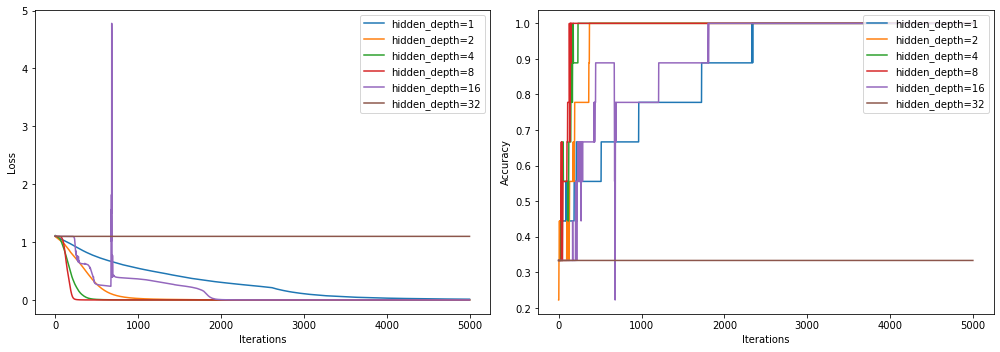

In [13]:
loss_records, acc_records = exp_net_depth(2, 3, X1, y1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].plot(loss_records[5])
ax[0].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].plot(acc_records[5])
ax[1].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 讨论隐藏层神经元个数对网络性能的影响

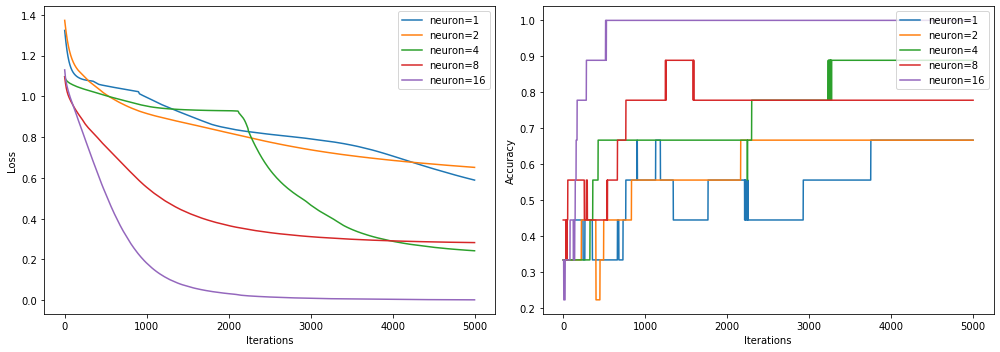

In [14]:
loss_records, acc_records = exp_hidden_neuron(2, 3, X1, y1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 学习率的影响

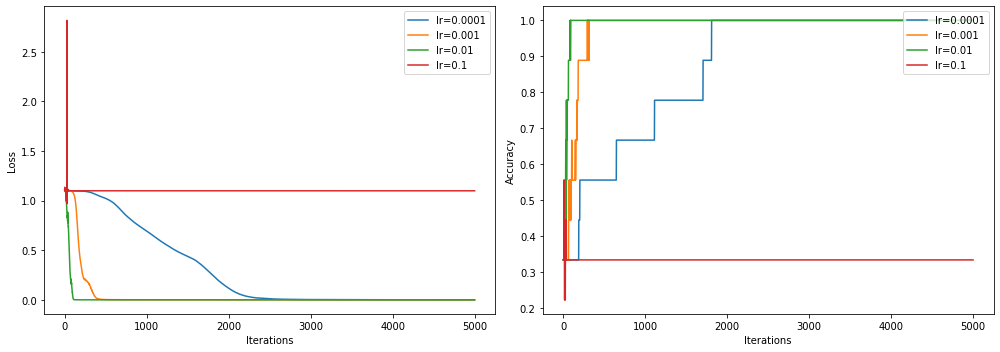

In [15]:
loss_records, acc_records = exp_lr(2, 3, X1, y1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 激活函数的影响

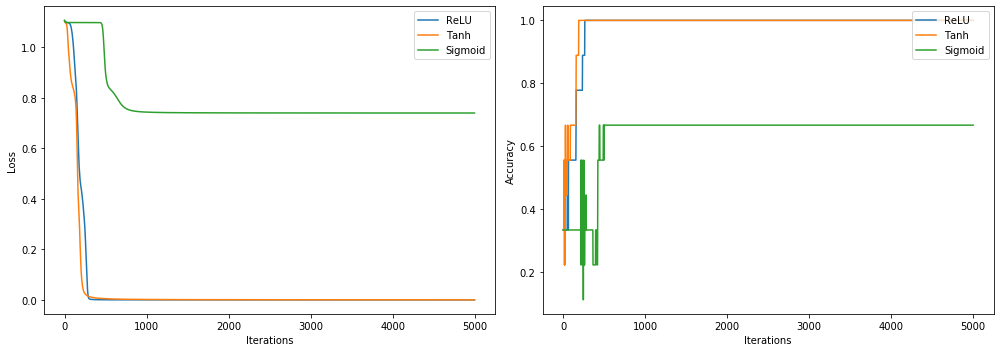

In [16]:
loss_records, acc_records = exp_activation(2, 3, X1, y1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

# 第二题

## 数据准备

In [17]:
X2 = torch.tensor([[0, 1, 0, 0, 1, 0, 0, 1, 0],
                   [1, 1, 1, 0, 1, 0, 0, 1, 0],
                   [1, 0, 1, 1, 0, 1, 1, 1, 1]], dtype=torch.float)
y2 = torch.tensor([0, 1, 2], dtype=torch.int64)

## 讨论隐藏层数对网络性能的影响

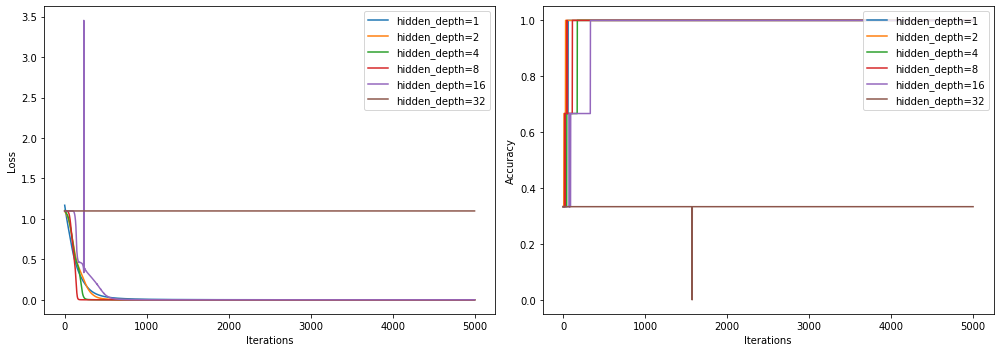

In [24]:
loss_records, acc_records = exp_net_depth(9, 3, X2, y2)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].plot(loss_records[5])
ax[0].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].plot(acc_records[5])
ax[1].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 讨论隐藏层神经元个数对网络性能的影响

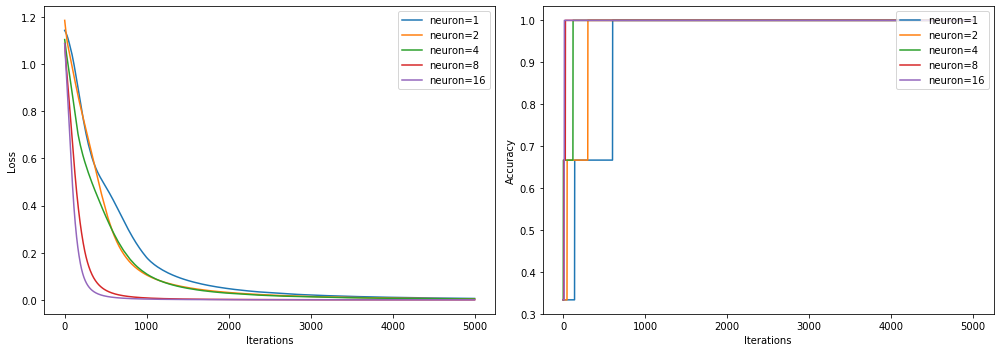

In [25]:
loss_records, acc_records = exp_hidden_neuron(9, 3, X2, y2)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 学习率的影响

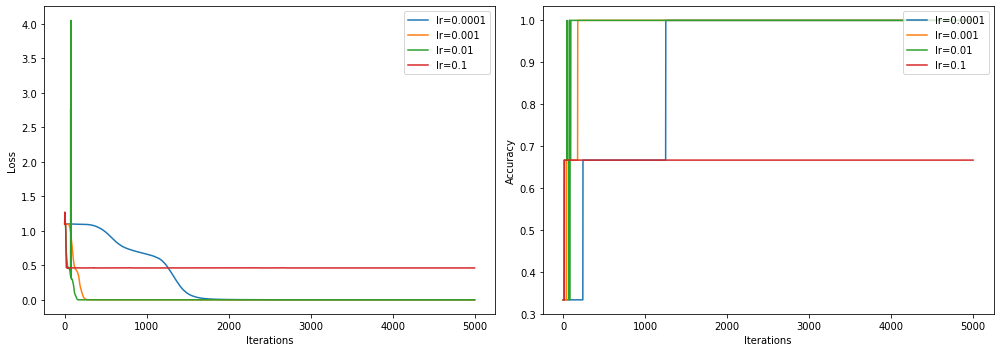

In [26]:
loss_records, acc_records = exp_lr(9, 3, X2, y2)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 激活函数的影响

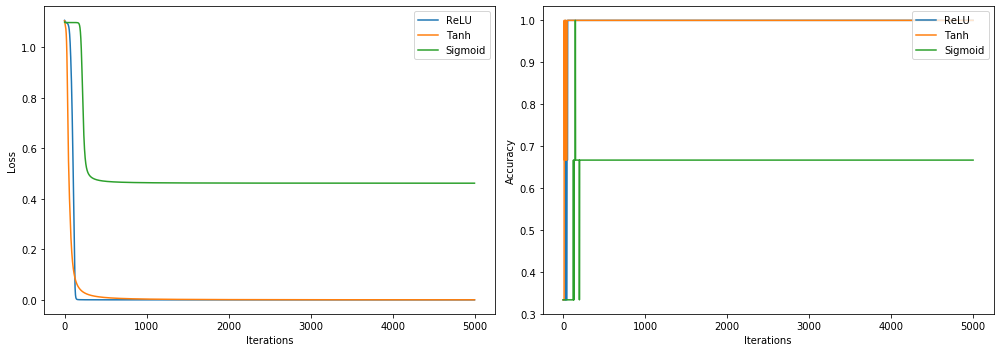

In [27]:
loss_records, acc_records = exp_activation(9, 3, X2, y2)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

# 第三题

## 数据准备

In [28]:
X_train, y_train, X_test, y_test = iris_data_generator()

## 讨论隐藏层数对网络性能的影响

val_loss: 0.186 | val_acc: 0.967
val_loss: 0.244 | val_acc: 0.983
val_loss: 0.419 | val_acc: 0.983
val_loss: 0.592 | val_acc: 0.967
val_loss: 0.802 | val_acc: 0.967
val_loss: 1.099 | val_acc: 0.333



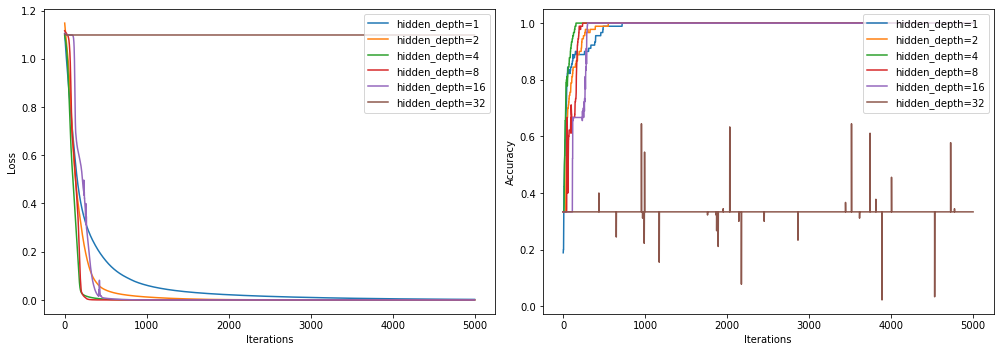

In [31]:
loss_records, acc_records = exp_net_depth(4, 3, X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].plot(loss_records[5])
ax[0].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].plot(acc_records[5])
ax[1].legend(('hidden_depth=1', 'hidden_depth=2', 'hidden_depth=4', 'hidden_depth=8', 'hidden_depth=16', 'hidden_depth=32'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 讨论隐藏层神经元个数对网络性能的影响

val_loss: 0.077 | val_acc: 0.967
val_loss: 0.088 | val_acc: 0.967
val_loss: 0.235 | val_acc: 0.950
val_loss: 0.254 | val_acc: 0.950
val_loss: 0.222 | val_acc: 0.967



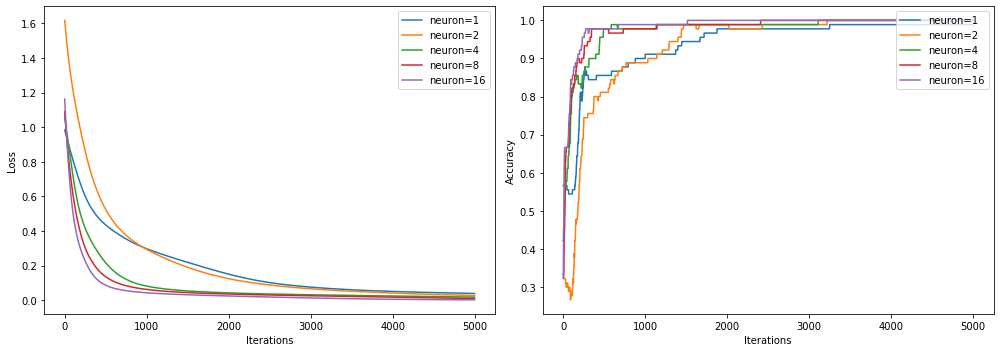

In [32]:
loss_records, acc_records = exp_hidden_neuron(4, 3, X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].plot(loss_records[4])
ax[0].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].plot(acc_records[4])
ax[1].legend(('neuron=1', 'neuron=2', 'neuron=4', 'neuron=8', 'neuron=16'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 学习率的影响

val_loss: 0.220 | val_acc: 0.967
val_loss: 0.593 | val_acc: 0.967
val_loss: 2.194 | val_acc: 0.950
val_loss: 2.383 | val_acc: 0.967



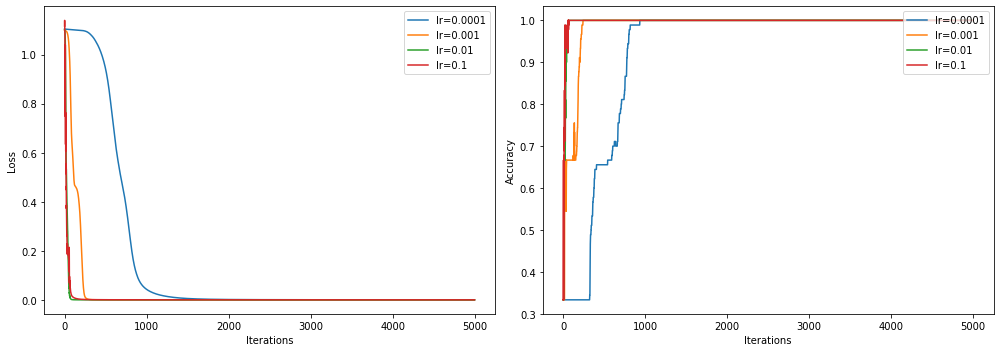

In [33]:
loss_records, acc_records = exp_lr(4, 3, X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].plot(loss_records[3])
ax[0].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].plot(acc_records[3])
ax[1].legend(('lr=0.0001', 'lr=0.001', 'lr=0.01', 'lr=0.1'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()

## 激活函数的影响

val_loss: 0.835 | val_acc: 0.967
val_loss: 0.303 | val_acc: 0.967
val_loss: 0.241 | val_acc: 0.967



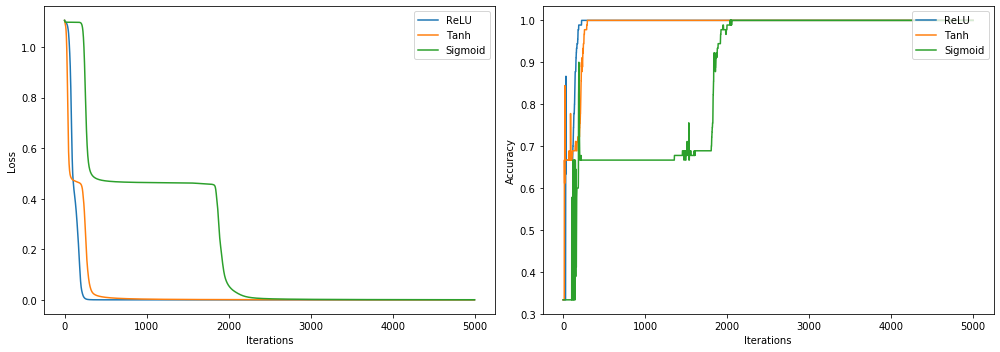

In [34]:
loss_records, acc_records = exp_activation(4, 3, X_train, y_train, X_test, y_test)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(loss_records[0])
ax[0].plot(loss_records[1])
ax[0].plot(loss_records[2])
ax[0].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

ax[1].plot(acc_records[0])
ax[1].plot(acc_records[1])
ax[1].plot(acc_records[2])
ax[1].legend(('ReLU', 'Tanh', 'Sigmoid'), loc='upper right')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

fig.tight_layout()